### Basic classification: Classify images of clothing
https://www.tensorflow.org/tutorials/keras/classification

In [1]:
import numpy as np
import tensorflow as tf
print(tf.__version__)

import matplotlib.pyplot as plt
%matplotlib inline

2.3.0


In [2]:
# importing the fashion mnist
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images, test_images = train_images/255., test_images/255. 
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

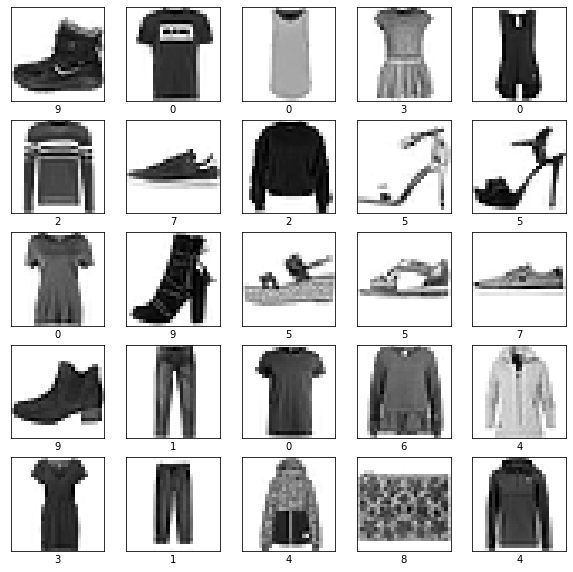

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(train_labels[i])
plt.show()

In [5]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Softmax()
])

In [6]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             metrics=['accuracy'],
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True))

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 905us/step - loss: 1.7981 - accuracy: 0.6688
Epoch 2/10
1875/1875 [==============================] - 2s 899us/step - loss: 1.7595 - accuracy: 0.7020
Epoch 3/10
1875/1875 [==============================] - 2s 911us/step - loss: 1.7524 - accuracy: 0.7086
Epoch 4/10
1875/1875 [==============================] - 2s 908us/step - loss: 1.7463 - accuracy: 0.7148
Epoch 5/10
1875/1875 [==============================] - 2s 900us/step - loss: 1.7426 - accuracy: 0.7184
Epoch 6/10
1875/1875 [==============================] - 2s 935us/step - loss: 1.7390 - accuracy: 0.7211
Epoch 7/10
1875/1875 [==============================] - 2s 930us/step - loss: 1.7372 - accuracy: 0.7230
Epoch 8/10
1875/1875 [==============================] - 2s 922us/step - loss: 1.7348 - accuracy: 0.7256
Epoch 9/10
1875/1875 [==============================] - 2s 929us/step - loss: 1.7321 - accuracy: 0.7279
Epoch 10/10
1875/1875 [==============================] - 2s 923u

In [9]:
preds = model.predict(test_images)
print(np.argmax(preds[0]),test_labels[0], preds[0])

7 9 [3.9148699e-07 3.9148699e-07 3.9148699e-07 3.9148699e-07 3.9148699e-07
 1.7816542e-01 3.9148699e-07 8.2183146e-01 3.9148699e-07 3.9148699e-07]


In [10]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 947us/step - loss: 1.7456 - accuracy: 0.7134


[1.7455546855926514, 0.7134000062942505]

In [11]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

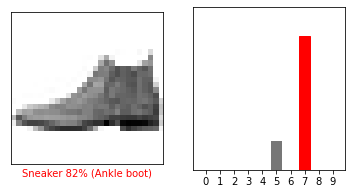

In [12]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, preds[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, preds[i],  test_labels)
plt.show()

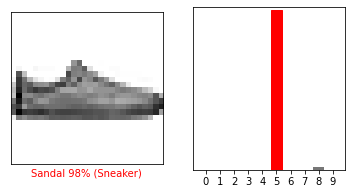

In [13]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, preds[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, preds[i],  test_labels)
plt.show()

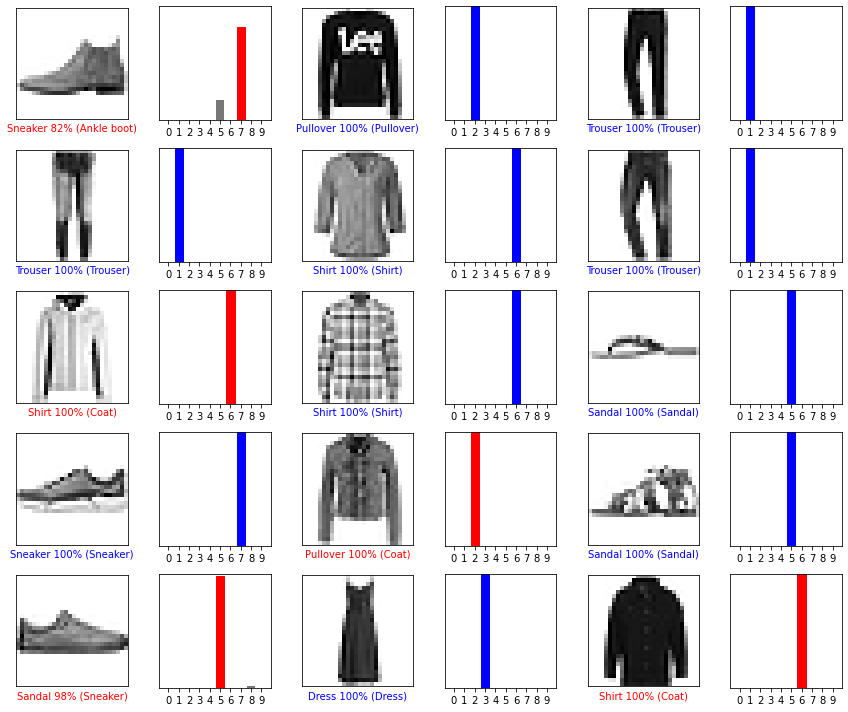

In [14]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, preds[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, preds[i], test_labels)
plt.tight_layout()
plt.show()

In [15]:
# predict on a single image
img = np.expand_dims(test_images[-1], 0)
preds = model.predict(img)
print(test_labels[-1], np.argmax(preds), preds)

5 5 [[6.8075016e-05 6.8075016e-05 6.8075016e-05 6.8075016e-05 6.8075016e-05
  9.9169183e-01 6.8075016e-05 6.7745666e-03 1.0571167e-03 6.8075016e-05]]
